# 1. Introduction

## 1.1 Overview

This project aims to build a movie recommendation system for the streaming service **DreamStream**. The system will be based on a dataset containing information about 45,000 movies and 26 million ratings from 270,000 DreamStream users. 

Recommender systems are essential for platforms like **DreamStream**, enabling them to provide personalized movie recommendations - a key factor in competing with other platforms. However, **DreamStream** is currently facing challenges with increasing user retentions. After several months of evaluation, external consultants have identified a major issue with the current recommender system: it fails to meet user expectations due to inaccurate and not relevant recommendations, increasing the likelihood of subscription cancellations. Thereby, the system's shortcomings are identified to come from its reliance on an oversimplified dataset and its failure to align with current industry standards.

In response to this challenge, **DreamStream** expanded their data collection efforts to include a broader range of data types about users and movies. Based on the new data, DreamStream wants to build a new recommender system that aligns with current industry standards. Thereby, the company seeks an independent team to rebuild the system from scratch without being compromised by the methods of the old one. Yet, as deployment comes with several risks and costs, the new system is aimed to be tested offline in the best possible way. As the issue of user retention has been directly linked to the relevance of the recommendations provided, the new system's success will be primarily evaluated based on its accuracy in delivering personalized movie suggestions.

**DreamStream** provided the following data, stored in a relational database:

- **Movies Metadata**: Contains information about 45,000 movies. This includes data such as the movie title, release date, budget, revenue, genres, keywords, production companies, production countries, spoken languages, and runtime.
- **Keywords**: Contains the keywords associated with each movie.
- **Credits**: Contains information about the cast and crew of each movie.
- **Links**: Contains the links to the IMDB and TMDB pages for each movie.
- **Ratings**: Contains 26 million ratings from 270,000 users for all 45,000 movies.


The project will be divided into the following steps:
1. **Introduction**: An overview of the project and the business problem that needs to be addressed.
2. **Data Preprocessing**: The data will be cleaned, transformed, and merged to create a dataset that can be used for an Exploratory Data Analysis (EDA).
3. **Exploratory Data Analysis (EDA)**: The data will be analyzed to gain insights into the distribution of movies, ratings, and other relevant information. Some further cleaning and preprocessing steps may be performed during this stage.
4. **Feature Engineering**: New features will be created to improve the performance of the recommendation system.
5. **Model Building**: Different recommendation algorithms will be implemented and evaluated to determine the best-performing model.
6. **Model Evaluation**: The models will be evaluated based on their performance and ability to provide accurate recommendations.
7. **Model Deployment**: ....


CRISP DM methodology will be followed to ensure a structured and systematic approach to the project. Yet, a preprocessing step will be added to the beginning of the process to ensure the data is cleaned and transformed before the analysis begins. This is nessesary to reduce computational time and to ensure that the data is in the right format for the analysis.

The project will be implemented using Python and the following libraries:

In [1084]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# 2. Data Preprocessing

## 2.1. Loading Data

In [994]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [995]:
df_credits = pd.read_csv("data/credits.csv")
df_keywords = pd.read_csv("data/keywords.csv")
df_links = pd.read_csv("data/links.csv")
df_movies_metadata = pd.read_csv("data/movies_metadata.csv")
df_ratings = pd.read_csv("data/ratings.csv")

/var/folders/ch/d6cx2m1d2nl8b8c4cm_30td00000gn/T/ipykernel_62217/792521500.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movies_metadata = pd.read_csv("data/movies_metadata.csv")


In [996]:
df_movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## 2.2. Removing Unnecessary Columns

To reduce computational time at an early stage, we will remove some unnecessary columns from the dataset.

#### df_ratings, df_credits, df_keywords and df_links

For `df_ratings` we keep all columns.

In [997]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


`df_credits`

Let's drop the crew column as it seems not to contain relevant information for a recommender system. We rather want to focus on the cast here.

In [998]:
df_credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [999]:
df_credits.drop(columns="crew", inplace=True)

For now we keep it like this. We will later extract only the actor's name from the cast column.

**ToDo: clean column "cast" from df_credits (just extract the name)**

`df_keywords`

Let's keep all columns here. We will later extract the keywords from the column "keywords".

In [1000]:
df_keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [1001]:
df_keywords.iloc[0,1]

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

**ToDo: maybe clean column "keywords" in df_keywords (only keep name)**

`df_links`

Let's keep all columns here

In [1002]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


#### df_movies_metadata

We will also drop some columns for the df_movies_metadata dataset. 

In [1003]:
df_movies_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

`adult`

In [1004]:
df_movies_metadata["adult"].value_counts()

adult
False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: count, dtype: int64

As only a very small portion of the values are True and we have some wrong entries. The column does not give any insights regarding future model building. Therefore, this column will be dropped.

In [1005]:
df_movies_metadata.drop(columns="adult", inplace=True)

`belongs_to_collection`

In [1006]:
df_movies_metadata[df_movies_metadata["belongs_to_collection"] == "{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"]

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,1995-10-30,3.735540e+08,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
2997,"{'id': 10194, 'name': 'Toy Story Collection', ...",90000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story-2,863,tt0120363,en,Toy Story 2,"Andy heads off to Cowboy Camp, leaving his toy...",17.547693,...,1999-10-30,4.973669e+08,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The toys are back!,Toy Story 2,False,7.3,3914.0
15348,"{'id': 10194, 'name': 'Toy Story Collection', ...",200000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/toystory/,10193,tt0435761,en,Toy Story 3,"Woody, Buzz, and the rest of Andy's toys haven...",16.96647,...,2010-06-16,1.066970e+09,103.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No toy gets left behind.,Toy Story 3,False,7.6,4710.0


It could be possible that there is a value in the column "belongs_to_collection" when there are several versions of the film. However, we are not sure about that yet!

Let's examine the columns `budget` and `revenue`.

In [1007]:
len(df_movies_metadata[df_movies_metadata["revenue"] == 0.0]) / len(df_movies_metadata)

0.8369330928605991

In [1008]:
len(df_movies_metadata[df_movies_metadata["budget"] == "0"]) / len(df_movies_metadata)

0.8044032903708266

84% of all rows in "revenue" and 80% of all rows in "budget" have a value of 0, so those values are simply unknown as it is unrealistic that that many movies have 0 budget and 0 revenue. Therefore, those columns will be dropped.

In [1009]:
df_movies_metadata.drop(columns=["revenue", "budget"], inplace=True)

Let's examine the difference between the columns `original_title` and `title`.

In [1010]:
len(df_movies_metadata[df_movies_metadata["original_title"] != df_movies_metadata["title"]]) / len(df_movies_metadata)

0.2507808032375841

Only 25% original_title values are the same as the title values. Let's examine some cases where we have different entries:

In [1011]:
df_movies_metadata[df_movies_metadata["original_title"] != df_movies_metadata["title"]]

,belongs_to_collection,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
28,NaN,"[{'id': 14, 'name': 'Fantasy'}, {'id': 878, 'n...",NaN,902,tt0112682,fr,La Cité des Enfants Perdus,A scientist in a surrealist society kidnaps ch...,9.822423,/eVo6ewq4akfyJYy3GXkMsLNzEJc.jpg,...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-05-16,108.0,"[{'iso_639_1': 'cn', 'name': '广州话 / 廣州話'}, {'i...",Released,Where happily ever after is just a dream.,The City of Lost Children,False,7.6,308.0
29,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,37557,tt0115012,zh,摇啊摇，摇到外婆桥,A provincial boy related to a Shanghai crime f...,1.100915,/qcoOCoN7viOhboGwhYXyApdDuiq.jpg,...,"[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",1995-04-30,108.0,"[{'iso_639_1': 'zh', 'name': '普通话'}]",Released,In 1930's Shanghai violence was not the proble...,Shanghai Triad,False,6.5,17.0
32,NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 12, ...",NaN,78802,tt0114952,fr,"Guillaumet, les ailes du courage",NaN,0.745542,/k6ODtR38dKEfuzSGjggr8KDyAF4.jpg,...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1996-09-18,50.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Wings of Courage,False,6.8,4.0
57,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,11010,tt0110877,it,Il postino,Simple Italian postman learns to love poetry w...,10.168437,/qkq2JfINRQi4Iu9VTMMtQFfmGWZ.jpg,...,"[{'iso_3166_1': 'BE', 'name': 'Belgium'}, {'is...",1994-09-22,108.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...",Released,NaN,The Postman,False,7.6,181.0
58,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",NaN,99040,tt0112714,fr,Le confessionnal,"The year is 1952, in Quebec City. Rachel (16),...",0.120789,/8RCRrSAY8e3Qn5p9cNv188ogmZQ.jpg,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}]",1995-09-29,100.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,The Confessional,False,6.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45453,NaN,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,404604,tt5690142,hi,Maa,The bliss of a biology teacher’s family life i...,1.559596,/zZwbntqdfKdVgzH1RoMHa99g0mJ.jpg,...,"[{'iso_3166_1': 'IN', 'name': 'India'}]",2017-07-07,146.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,Mom,False,6.6,14.0
45455,NaN,[],NaN,67179,tt0069215,it,San Michele aveva un gallo,Sentenced to life imprisonment for illegal act...,0.225051,/j1AN0L4motTt8SBxeTMXDtExsYl.jpg,...,[],1972-01-01,90.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,St. Michael Had a Rooster,False,6.0,3.0
45461,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,...,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,NaN,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,...,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0


`original title` is in the original language, `title` in English. Therefore, only `title` will be kept.

In [1012]:
df_movies_metadata.drop(columns=["original_title"], inplace=True)

Let's examine the `popularity` column.

In [1013]:
# value counts
#df_movies_metadata['popularity'].value_counts()

In [1014]:
'''df_movies_metadata['popularity'] = pd.to_numeric(df_movies_metadata['popularity'], errors='coerce')
df_movies_metadata['popularity'].describe()'''

"df_movies_metadata['popularity'] = pd.to_numeric(df_movies_metadata['popularity'], errors='coerce')\ndf_movies_metadata['popularity'].describe()"

- The popularity score ranges from 0 to 547.488
- Popularity is described as "A numeric quantity specifying the movie popularity."
- From IMDB: "Our Most Popular charts use data from the search behavior of IMDb's more than 250 million monthly unique visitors to rank the hottest, most buzzed about movies and TV shows."
- It is difficult to interpret the popularity score without additional context, therefore we will drop this column.

In [1015]:
#df_merged.drop('popularity', axis=1, inplace=True)

`poster_path`

Let's delete this column as we wont implement any image recognition in our models

In [1016]:
df_movies_metadata.poster_path

0        /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1        /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2        /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3        /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4        /e64sOI48hQXyru7naBFyssKFxVd.jpg
                       ...               
45461    /jldsYflnId4tTWPx8es3uzsB1I8.jpg
45462    /xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg
45463    /d5bX92nDsISNhu3ZT69uHwmfCGw.jpg
45464    /aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg
45465    /s5UkZt6NTsrS7ZF0Rh8nzupRlIU.jpg
Name: poster_path, Length: 45466, dtype: object

In [1017]:
df_movies_metadata.drop(columns=["poster_path"], inplace=True)

Let's proceed with the `status` column:

In [1018]:
df_movies_metadata["status"].value_counts()

status
Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: count, dtype: int64

There are some films in the dataset which are not released yet. Those movies are not relevant for a Recommender System. We cut them out and drop the status column.

In [1019]:
df_movies_metadata = df_movies_metadata[df_movies_metadata["status"] == "Released"]
df_movies_metadata.drop(columns=["status"], inplace=True)

Let's look at the `video` column, to understand what it represents:

In [1020]:
df_movies_metadata["video"].value_counts()

video
False    44921
True        93
Name: count, dtype: int64

Only 93 of the values are True. Let's examine those further:

In [1021]:
df_movies_metadata[df_movies_metadata["video"] == True]

,belongs_to_collection,genres,homepage,id,imdb_id,original_language,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,tagline,title,video,vote_average,vote_count
5492,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,15173,tt0298388,en,"Get ready as Bob the Tomato, Larry the Cucumbe...",1.734181,"[{'name': 'Big Idea Productions', 'id': 3204}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-10-04,82.0,"[{'iso_639_1': 'cs', 'name': 'Český'}, {'iso_6...",Fresh Fish. Mixed Vegetables.,Jonah: A VeggieTales Movie,True,6.4,22.0
11469,"{'id': 123438, 'name': 'Loose Change Collectio...","[{'id': 99, 'name': 'Documentary'}]",http://www.loosechange911.com/,14277,tt0831315,en,What if...September 11th was not a surprise at...,0.651714,"[{'name': 'Polar Film Medien GmbH', 'id': 52...","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-06-01,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",What really happened on 9/11?,Loose Change: 2nd Edition,True,6.3,16.0
13564,NaN,"[{'id': 99, 'name': 'Documentary'}]",NaN,284117,tt1198399,en,A short film in which Quran verses are shown a...,0.040068,[],"[{'iso_3166_1': 'NL', 'name': 'Netherlands'}]",2008-03-27,15.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",NaN,Fitna,True,1.0,1.0
14271,"{'id': 190135, 'name': 'Love Hina Collection',...","[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,44685,tt0416938,ja,"The tests have come, and Keitaro can only hope...",1.785708,"[{'name': 'TV Tokyo', 'id': 3034}, {'name': 'X...","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2001-03-31,48.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Spring break... Love Hina Style!!,Love Hina Spring Special - I Wish Your Dream,True,4.7,3.0
14608,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/familyzone/playmobil/,35148,tt1512792,en,"Ahoy, matey! Your Favorite Playmobil toys have...",0.014168,[],[],2009-10-13,140.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",NaN,Playmobil: The Secret of Pirate Island,True,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44286,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 16, 'nam...",NaN,161337,tt2381375,en,Underworld: Endless War is a collection of thr...,3.301063,[],[],2011-10-19,18.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Underworld: Endless War,True,5.6,38.0
44798,NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 27, '...",http://www.fat-pie.com/salad.htm,425916,tt1830238,en,"The adventures of Salad Fingers, an unspecifie...",0.141367,[],"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",NaN,52.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Salad Fingers,True,8.5,4.0
44861,NaN,[],NaN,334795,tt2290966,ru,Four music videos of Kino band joined together...,0.0,[],[],1986-01-01,23.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Victor Tsoy's movie debut,The End of a Vacation,True,0.0,0.0
44981,NaN,"[{'id': 10751, 'name': 'Family'}, {'id': 18, '...",NaN,461088,tt5689610,fa,When the corrupted groom starts shooting in th...,0.034119,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",2016-03-22,89.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",NaN,50 Kilos of Sour Cherry,True,0.0,0.0


We do not see any patterns in rows where the value of the video column is set to True. Additionally, as there are only 93 instances where this is the case, those rows will be dropped. Also, the column will be kicked as it has no insight for us.

In [1022]:
df_movies_metadata= df_movies_metadata[df_movies_metadata["video"] == False]
df_movies_metadata.drop(columns="video", inplace=True)

`Vote Count and Vote Average`

Let's try to understand the Cote Count and Vote Average columns. 

In [1023]:
# Min and Max vote count 
min_vote_count = df_movies_metadata['vote_count'].min()
max_vote_count = df_movies_metadata['vote_count'].max()

min_vote_count, max_vote_count

(0.0, 14075.0)

In [1024]:
min_vote_average = df_movies_metadata['vote_average'].min()
max_vote_average = df_movies_metadata['vote_average'].max()

min_vote_average, max_vote_average

(0.0, 10.0)

- The vote count ranges from 0 to 14075, probably indicating the number of votes the movie received.
- The vote average ranges from 0 to 10, probably indicating the average rating of the movie.


In [1025]:
df_movies_metadata['vote_count'].describe()

count    44921.000000
mean       111.103560
std        494.117134
min          0.000000
25%          3.000000
50%         10.000000
75%         35.000000
max      14075.000000
Name: vote_count, dtype: float64

We can also see that half of the movies have fewer than 10 votes. As this is a very low number of votes, making the votes not representative from a statistical perspective, we decide to drop the vote_count column as well as the corresponding vote_average column. We will only use the ratings dataframe for the ratings.

In [1026]:
df_movies_metadata.drop(['vote_count', 'vote_average'], axis=1, inplace=True)

On top of that, the following columns will be dropped:
- `homepage`: not relevant for the model
- `tagline`: not relevant for the model

In [1027]:
df_movies_metadata.drop(columns=["homepage", "tagline"], inplace=True)

## 2.3. Column Formats

Let's check and correct the column formats for every dataframe.

#### df_ratings, df_credits, df_keywords and df_links

In [1028]:
df_ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [1029]:
df_credits.dtypes

cast    object
id       int64
dtype: object

In [1030]:
df_keywords.dtypes

id           int64
keywords    object
dtype: object

In [1031]:
df_links.dtypes

movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

In [1032]:
#df_ratings[["userId", "movieId", "timestamp"]].astype("Int64")
df_ratings["rating"] = df_ratings["rating"].astype("Float64")
df_credits["id"] = df_credits["id"].astype("Int64")
df_keywords["id"] = df_keywords["id"].astype("Int64")
df_links[["movieId", "imdbId"]] = df_links[["movieId", "imdbId"]].astype("Int64")

For the column imdbId, let's check if all values are integers and convert them

In [1033]:
if df_links['tmdbId'].dropna().apply(float.is_integer).all():
    df_links['tmdbId'] = df_links['tmdbId'].astype('Int64')
else:
    print("Values have digits after the decimal point.")

#### df_movies_metadata

A first overview shows us that a couple of column formats have to be changed

In [1034]:
df_movies_metadata.dtypes

belongs_to_collection     object
genres                    object
id                        object
imdb_id                   object
original_language         object
overview                  object
popularity                object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
title                     object
dtype: object

In [1035]:
df_movies_metadata.head()

,belongs_to_collection,genres,id,imdb_id,original_language,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,title
0,"{'id': 10194, 'name': 'Toy Story Collection', ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story
1,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men
3,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale
4,"{'id': 96871, 'name': 'Father of the Bride Col...","[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II


`id`

In [1036]:
df_movies_metadata["id"] = df_movies_metadata["id"].astype("Int64")

`imdb_id`

In [1037]:
df_movies_metadata[df_movies_metadata["imdb_id"].notna()]["imdb_id"].sort_values()

43777    tt0000001
32312    tt0000003
19138    tt0000005
17569    tt0000008
25900    tt0000010
           ...    
45179    tt7068896
45200    tt7078780
44969    tt7078926
45085    tt7104950
45371    tt7158814
Name: imdb_id, Length: 44906, dtype: object

All `imbd_id` values start with "tt". Let's delete those letters to align values with other imdb_id columns we have in other dataframes.

In [1038]:
# Let's check if the letters "tt" are in front of every number:

df_movies_metadata_2 = df_movies_metadata.copy()
df_movies_metadata_2["imdb_id"] = df_movies_metadata_2["imdb_id"].astype(str)
df_movies_metadata_2['last_2_chars'] = df_movies_metadata_2['imdb_id'].str[:2]
df_movies_metadata_2['last_2_chars'].value_counts()

last_2_chars
tt    44906
na       15
Name: count, dtype: int64

In [1039]:
df_movies_metadata["imdb_id"] = df_movies_metadata["imdb_id"].str[2:]

In [1040]:
df_movies_metadata["imdb_id"] = df_movies_metadata["imdb_id"].astype("Int64")

The column popularity seems to be of mixed data types. Therefore, we have to do the conversion in 2 steps.

In [1041]:
df_movies_metadata['popularity'] = pd.to_numeric(df_movies_metadata['popularity'], errors='coerce')
df_movies_metadata['popularity'] = df_movies_metadata['popularity'].astype(int)

In [1042]:
df_movies_metadata['release_date'] = pd.to_datetime(df_movies_metadata['release_date'])

In the next steps, we will look at outliers and missing values. Therefore, we will first merge the dataframes as this will be the final dataset we use for our model building.

In [1043]:
df_keywords.dtypes

id           Int64
keywords    object
dtype: object

In [1044]:
df_links.dtypes

movieId    Int64
imdbId     Int64
tmdbId     Int64
dtype: object

### Missing Values

Let's check and cleanin missing values in our data. To do so, we will merge the dataframes df_keywords, df_links, df_credits, df_movies_metadata. df_ratings will be cleaned seperatly to safe computational time. 

In [1045]:
df_merged = pd.merge(df_keywords, df_links, left_on='id', right_on='tmdbId', how='left')
df_merged = pd.merge(df_merged, df_credits, left_on='id', right_on='id', how='left')
df_merged = pd.merge(df_merged, df_movies_metadata, left_on="imdbId", right_on="imdb_id", how="left")
df_merged.drop(columns=["id_y", "imdb_id"], inplace=True)

As we have different Ids in the dataframes, to identify the movies, let's see which one we want to keep.

In [1046]:
print(df_ratings["movieId"].min())
print(df_ratings["movieId"].max())

df_merged[['id_x', 'movieId', 'tmdbId', 'imdbId']].describe()

1
176275


,id_x,movieId,tmdbId,imdbId
count,46756.0,46756.0,46756.0,46756.0
mean,109630.739114,97647.136924,109630.739114,1003898.326161
std,112824.139177,57206.087054,112824.139177,1366859.752041
min,2.0,1.0,2.0,1.0
25%,26717.25,51125.0,26717.25,83509.75
50%,61377.0,110483.0,61377.0,287635.0
75%,159434.5,147392.5,159434.5,1560822.75
max,469172.0,176279.0,469172.0,7158814.0


We can see that the movieId column in df_ratings contains the same IDs as in the movieId column in df_merged. Let's drop the other columns and proceed with the NaN cleaning.

In [1047]:
df_merged.drop(columns=["id_x", "imdbId", "tmdbId"], inplace=True)

#### df_ratings

No NaNs for df_ratings. Therefore, no cleaning necessary.

In [1048]:
print(df_ratings.isna().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


#### df_merged

We have several columns with missing values in the merged dataframe. Let's check and clean them.

In [1049]:
print("Total NaN values:\n ", df_merged.isna().sum())

Total NaN values:
  keywords                     0
movieId                      0
cast                         0
belongs_to_collection    42216
genres                     763
original_language          773
overview                  1714
popularity                 763
production_companies       763
production_countries       763
release_date               832
runtime                   1018
spoken_languages           763
title                      763
dtype: int64


In [1050]:
print("\nShare of NaN values:\n ", (df_merged.isna().sum()) / len(df_merged) * 100)


Share of NaN values:
  keywords                  0.000000
movieId                   0.000000
cast                      0.000000
belongs_to_collection    90.290016
genres                    1.631876
original_language         1.653264
overview                  3.665840
popularity                1.631876
production_companies      1.631876
production_countries      1.631876
release_date              1.779451
runtime                   2.177261
spoken_languages          1.631876
title                     1.631876
dtype: float64


We have a high precentage of missing values for 'belongs_to_collection'. These makes sense as not all movies belong to a collection. Therefore, we will leave those NaNs as they are for now.

Also, we can see a pattern for most of the variables where the number of missing values is the same. Overall the percentage of missing values is very low. Let's check for the ratio of missing values in the overall dataset.

In [1051]:
print("Percentage of rows with mising values: ", (df_merged.drop(columns=['belongs_to_collection']).isna().any(axis=1).sum() / len(df_merged)*100).round(2))

Percentage of rows with mising values:  3.8


Let's drop all rows with missing values as they only account for 3.8% of the dataset and we want to ensure data completeness.

In [1052]:
df_merged.dropna(subset=['genres', 'original_language', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'title'], inplace=True)

Finally, there are also some columns which contain values such as "xx" or empty lists. Let's investigate those further.

In [1053]:
df_merged

,keywords,movieId,cast,belongs_to_collection,genres,original_language,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,title
0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",1,"[{'cast_id': 14, 'character': 'Woody (voice)',...","{'id': 10194, 'name': 'Toy Story Collection', ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,"Led by Woody, Andy's toys live happily in his ...",21.0,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story
1,"[{'id': 10090, 'name': 'board game'}, {'id': 1...",2,"[{'cast_id': 1, 'character': 'Alan Parrish', '...",NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,When siblings Judy and Peter discover an encha...,17.0,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji
2,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",3,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,A family wedding reignites the ancient feud be...,11.0,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men
3,"[{'id': 818, 'name': 'based on novel'}, {'id':...",4,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...",NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,"Cheated on, mistreated and stepped on, the wom...",3.0,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale
4,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",5,"[{'cast_id': 1, 'character': 'George Banks', '...","{'id': 96871, 'name': 'Father of the Bride Col...","[{'id': 35, 'name': 'Comedy'}]",en,Just when George Banks has recovered from his ...,8.0,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46750,[],176267,"[{'cast_id': 1, 'character': 'Sir Robert Hode'...",NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",en,"Yet another version of the classic epic, with ...",5.0,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Robin Hood
46752,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,...",176271,"[{'cast_id': 1002, 'character': 'Sister Angela...",NaN,"[{'id': 18, 'name': 'Drama'}]",tl,An artist struggles to finish his work while a...,0.0,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Century of Birthing
46753,[],176273,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...",NaN,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",en,"When one of her hits goes wrong, a professiona...",0.0,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Betrayal
46754,[],176275,"[{'cast_id': 2, 'character': '', 'credit_id': ...",NaN,[],en,"In a small town live two brothers, one a minis...",0.0,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,87.0,[],Satan Triumphant


### Check Ranges / Identify Outliers

#### df_ratings

We have ratings from 0 to 5. It seems like overall there are no outliers.

In [1054]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,2.602429e+07,2.602429e+07,26024289.0,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.52809,1.171258e+09
std,7.817620e+04,3.108526e+04,1.065443,2.052889e+08
min,1.000000e+00,1.000000e+00,0.5,7.896520e+08
25%,6.716400e+04,1.073000e+03,3.0,9.907545e+08
50%,1.351630e+05,2.583000e+03,3.5,1.151716e+09
75%,2.026930e+05,6.503000e+03,4.0,1.357578e+09
max,2.708960e+05,1.762750e+05,5.0,1.501830e+09


#### df_merged

In [1055]:
df_merged.describe()

,movieId,popularity,release_date,runtime
count,44977.0,44977.000000,44977,44977.000000
mean,96594.315161,2.542811,1992-04-21 20:52:51.861173376,95.137626
min,1.0,0.000000,1874-12-09 00:00:00,0.000000
25%,48560.0,0.000000,1978-06-23 00:00:00,85.000000
50%,109284.0,1.000000,2001-09-14 00:00:00,95.000000
75%,146550.0,3.000000,2011-01-06 00:00:00,107.000000
max,176279.0,547.000000,2017-12-27 00:00:00,1256.000000
std,57335.768138,6.005085,NaN,37.278343


We have some unusual values in the columns `popularity`, `runtime`, `vote_count` and `release_date`. Let's check those further.

`popularity`

Text(0, 0.5, 'Popularity')

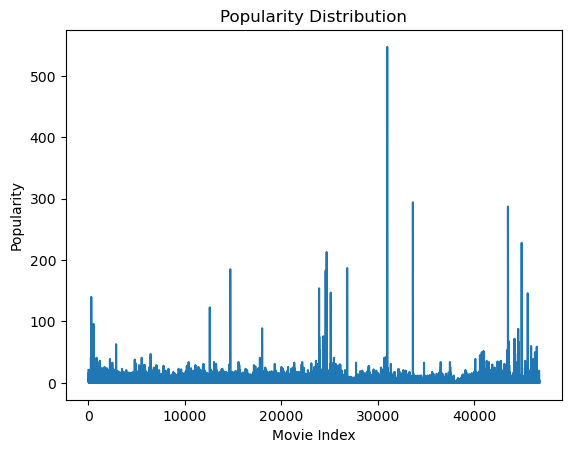

In [1056]:
ax = df_merged['popularity'].plot()

ax.set_title("Popularity Distribution")
ax.set_xlabel("Movie Index")
ax.set_ylabel("Popularity")

In [1057]:
df_merged[df_merged['popularity']>200].sort_values(by="popularity", ascending=False)

,keywords,movieId,cast,belongs_to_collection,genres,original_language,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,title
30980,"[{'id': 3487, 'name': 'assistant'}, {'id': 179...",135887,"[{'cast_id': 22, 'character': 'Scarlet Overkil...","{'id': 86066, 'name': 'Despicable Me Collectio...","[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",en,"Minions Stuart, Kevin and Bob are recruited by...",547.0,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-06-17,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Minions
33641,"[{'id': 849, 'name': 'dc comics'}, {'id': 1701...",143355,"[{'cast_id': 0, 'character': 'Wonder Woman / D...","{'id': 468552, 'name': 'Wonder Woman Collectio...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,An Amazon princess comes to the world of Man t...,294.0,"[{'name': 'Dune Entertainment', 'id': 444}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2017-05-30,141.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Wonder Woman
43498,"[{'id': 254, 'name': 'france'}, {'id': 2343, '...",168366,"[{'cast_id': 174, 'character': 'Belle', 'credi...",NaN,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",en,A live-action adaptation of Disney's version o...,287.0,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2017-03-16,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Beauty and the Beast
44919,"[{'id': 642, 'name': 'robbery'}, {'id': 2076, ...",171763,"[{'cast_id': 9, 'character': 'Baby', 'credit_i...",NaN,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,After being coerced into working for a crime b...,228.0,"[{'name': 'Big Talk Productions', 'id': 443}, ...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2017-06-28,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Baby Driver
24699,"[{'id': 380, 'name': 'brother brother relation...",115617,"[{'cast_id': 23, 'character': 'Baymax (voice)'...",NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",en,The special bond that develops between plus-si...,213.0,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-24,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Big Hero 6


`runtime`

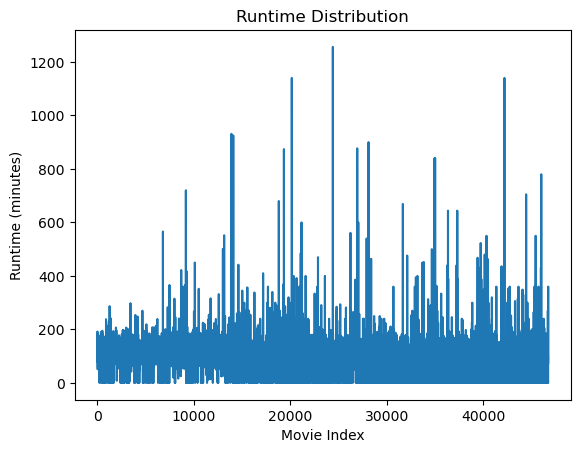

count    44977.000000
mean        95.137626
std         37.278343
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64


In [1058]:
ax = df_merged['runtime'].plot()

# Set the title and labels
ax.set_title("Runtime Distribution")
ax.set_xlabel("Movie Index")
ax.set_ylabel("Runtime (minutes)")

# Show the plot
plt.show()

print(df_merged['runtime'].describe())

It seems like we have some unusualy high and unusualy low values. for the runtime.

In [1059]:
num_movies_shorter_than_45min = len(df_merged[df_merged['runtime'] < 45])
percentage = num_movies_shorter_than_45min / len(df_merged) * 100
print("Percentage of movies shorter than 45 min : {:.2f}".format(percentage))

Percentage of movies shorter than 45 min : 6.01


5.78 % of the movies are shorter then 45 min. At this point we decide that we want to recommend movies that are at least 45 min long. Therefore, we will drop those rows. We will also drop all movies that are longer than 300 min (5 hours). This as well is a decision we make at this point regarding the scope of the streaming service at its recommender system. Moreover we can assume several outliers that do not represent real or only experimental movies. The longest cinematic movie ever created is 873 min long. (https://en.wikipedia.org/wiki/List_of_longest_films)

In [1060]:
df_merged = df_merged[(df_merged['runtime'] >= 45) & (df_merged['runtime'] <= 300)].copy()

`release_date`

There seems to be something wrong with the Release Date as the earliest date is in the year 1874.

In [1061]:
df_merged.sort_values(by="release_date")

,keywords,movieId,cast,belongs_to_collection,genres,original_language,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,title
44410,"[{'id': 154802, 'name': 'silent film'}, {'id':...",170573,"[{'cast_id': 2, 'character': '', 'credit_id': ...",NaN,"[{'id': 36, 'name': 'History'}, {'id': 28, 'na...",en,Just as Fritz Lang’s Metropolis (1927) is test...,0.0,"[{'name': 'Johnson and Gibson', 'id': 74308}, ...","[{'iso_3166_1': 'AU', 'name': 'Australia'}]",1906-12-26,60.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",The Story of the Kelly Gang
25038,"[{'id': 6154, 'name': 'hell'}, {'id': 41011, '...",116578,"[{'cast_id': 1001, 'character': 'Dante Alighie...",NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",it,Loosely adapted from Dante's Divine Comedy and...,0.0,"[{'name': 'Milano Films', 'id': 93689}]","[{'iso_3166_1': 'IT', 'name': 'Italy'}]",1911-07-01,68.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",L'inferno
17909,[],89323,"[{'cast_id': 10, 'character': 'King Edward IV'...",NaN,"[{'id': 18, 'name': 'Drama'}]",en,Shakespeare's tragedy of the hump-backed Duke ...,0.0,"[{'name': ""Le Film d'Art"", 'id': 1573}, {'name...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1912-10-15,55.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Richard III
44366,"[{'id': 1405, 'name': 'roman empire'}, {'id': ...",170479,"[{'cast_id': 1001, 'character': 'Cleopatra, Qu...",NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",en,The fabled queen of Egypt's affair with Roman ...,0.0,"[{'name': 'Helen Gardner Picture Players', 'id...","[{'iso_3166_1': 'US', 'name': 'United States o...",1912-11-13,88.0,[],Cleopatra
20718,[],100946,"[{'cast_id': 5, 'character': 'Fantômas / Gurn'...","{'id': 188534, 'name': 'Fantômas Serial', 'pos...","[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",fr,"For the arch-criminal Fantômas, no crime is to...",0.0,[],"[{'iso_3166_1': 'FR', 'name': 'France'}]",1913-05-09,54.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Fantômas: In the Shadow of the Guillotine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43545,"[{'id': 131, 'name': 'italy'}, {'id': 818, 'na...",168492,"[{'cast_id': 4, 'character': 'Elio Perlman', '...",NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",en,Elio Perlman is spending the summer with his f...,4.0,"[{'name': 'Sony Pictures Classics', 'id': 58},...","[{'iso_3166_1': 'BR', 'name': 'Brazil'}, {'iso...",2017-10-27,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Call Me by Your Name
46291,"[{'id': 886, 'name': 'film making'}, {'id': 16...",175151,"[{'cast_id': 9, 'character': 'Himself', 'credi...",NaN,"[{'id': 99, 'name': 'Documentary'}]",en,78 shots. 52 cuts. The shower scene from PSYCHO.,2.0,"[{'name': 'Exhibit A Pictures', 'id': 63267}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2017-11-03,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",78/52
45809,[],173731,"[{'cast_id': 4, 'character': 'Sam', 'credit_id...",NaN,[],en,A former rodeo champ befriends a young man wit...,1.0,[],[],2017-11-17,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Sweet Virginia
43540,"[{'id': 1382, 'name': 'factory'}, {'id': 2609,...",168478,[],NaN,"[{'id': 99, 'name': 'Documentary'}]",hi,This portrayal of the rhythm of life and work ...,0.0,[],[],2017-11-30,71.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Machines


It turns out that some films actually date back to as early as 1874. Therefore, those rows will be kept.

### Check for duplicates

`df_ratings`

In [1062]:
df_ratings.duplicated().sum()

0

`df_merged`

In [1063]:
number_of_dublicates = df_merged.duplicated().sum()
number_of_dublicates

1055

In [1064]:
number_of_dublicates / len(df_merged) * 100

2.5018378429652115

There are 1055 duplicates in the df_merged dataset. Let's drop those rows, they only account for 2,5 % of the data.

In [1065]:
df_merged.drop_duplicates(inplace = True)

## 2.4. Column Transformations

Let's transform some columns to make them more useful for our later model building.

First, we will transform the "belongs_to_collection" column to binary values to indicate if a movie belongs to a collection or not.

In [1066]:
df_merged['belongs_to_collection'] = df_merged['belongs_to_collection'].notnull().astype(int)

Finally, we will extract some useful information from the columns "cast", "genres", "production_companies", "production_countries" and "spoken_languages".

`cast`

Let's extract the actors' names from the cast column.

In [1067]:
import ast

# Attempting to convert 'cast' column into list of dicts (if they're strings) and extract cast names
def extract_cast_names(cast_str):
    try:
        # If cast_str is not NaN and is a string, parse it; otherwise, it's already in expected format or NaN
        cast_data = ast.literal_eval(cast_str) if isinstance(cast_str, str) else cast_str
        if isinstance(cast_data, list):
            return [d.get('name') for d in cast_data if 'name' in d]
        else:
            return []
    except ValueError as e:
        print(f"Error parsing: {cast_str}. Error: {e}")
        return []

# Apply the function to the 'cast' column
df_merged['actors'] = df_merged['cast'].apply(extract_cast_names)

# Check the first few rows to ensure the names are extracted correctly
df_merged[['movieId', 'actors']].head()

,movieId,actors
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,..."
2,3,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop..."
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi..."
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim..."


In [1068]:
df_merged.drop(columns="cast", inplace=True)

`keywords`

Let's extract the keywords.

In [1069]:
df_merged.iloc[0,0]

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

In [1070]:
def extract_keyword_names(keyword_str):
    try:
        # If keyword_str is not NaN and is a string, parse it; otherwise, it's already in expected format or NaN
        keywords_data = ast.literal_eval(keyword_str) if isinstance(keyword_str, str) else keyword_str
        if isinstance(keywords_data, list):
            return [d.get('name') for d in keywords_data if 'name' in d]
        else:
            return []
    except ValueError as e:
        print(f"Error parsing: {keyword_str}. Error: {e}")
        return []

# Apply the function to the 'keywords' column
df_merged['keywords_extracted'] = df_merged['keywords'].apply(extract_keyword_names)

# Check the first few rows to ensure the names are extracted correctly
df_merged[['movieId', 'keywords_extracted']].head()

,movieId,keywords_extracted
0,1,"[jealousy, toy, boy, friendship, friends, riva..."
1,2,"[board game, disappearance, based on children'..."
2,3,"[fishing, best friend, duringcreditsstinger, o..."
3,4,"[based on novel, interracial relationship, sin..."
4,5,"[baby, midlife crisis, confidence, aging, daug..."


In [1071]:
df_merged.drop(columns="keywords", inplace=True)

`genres`

Let's extract the genre names.

In [1072]:
df_merged.iloc[0, 3]

'en'

In [1073]:
# Function to extract genre names
def extract_genre_names(genre_str):
    try:
        # If genre_str is not NaN and is a string, parse it; otherwise, it's already in expected format or NaN
        genres_data = ast.literal_eval(genre_str) if isinstance(genre_str, str) else genre_str
        if isinstance(genres_data, list):
            return [d.get('name') for d in genres_data if 'name' in d]
        else:
            return []
    except ValueError as e:
        print(f"Error parsing: {genre_str}. Error: {e}")
        return []

# Apply the function to the 'genres' column
df_merged['genre_extracted'] = df_merged['genres'].apply(extract_genre_names)

# Check the first few rows to ensure the names are extracted correctly
df_merged[['movieId', 'genre_extracted']].head()


,movieId,genre_extracted
0,1,"[Animation, Comedy, Family]"
1,2,"[Adventure, Fantasy, Family]"
2,3,"[Romance, Comedy]"
3,4,"[Comedy, Drama, Romance]"
4,5,[Comedy]


In [1074]:
df_merged.drop(columns="genres", inplace=True)

In [1075]:
df_merged.head()

,movieId,belongs_to_collection,original_language,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,title,actors,keywords_extracted,genre_extracted
0,1,1,en,"Led by Woody, Andy's toys live happily in his ...",21.0,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[jealousy, toy, boy, friendship, friends, riva...","[Animation, Comedy, Family]"
1,2,0,en,When siblings Judy and Peter discover an encha...,17.0,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]"
2,3,1,en,A family wedding reignites the ancient feud be...,11.0,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[fishing, best friend, duringcreditsstinger, o...","[Romance, Comedy]"
3,4,0,en,"Cheated on, mistreated and stepped on, the wom...",3.0,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,"[Whitney Houston, Angela Bassett, Loretta Devi...","[based on novel, interracial relationship, sin...","[Comedy, Drama, Romance]"
4,5,1,en,Just when George Banks has recovered from his ...,8.0,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[baby, midlife crisis, confidence, aging, daug...",[Comedy]


`Production Company`

Let's extract the production companies.

In [1076]:
df_merged.iloc[10, 6]

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [1077]:
def extract_production_company_names(company_str):
    try:
        # If company_str is not NaN and is a string, parse it; otherwise, it's already in expected format or NaN
        companies_data = ast.literal_eval(company_str) if isinstance(company_str, str) else company_str
        if isinstance(companies_data, list):
            return [d.get('name') for d in companies_data if 'name' in d]
        else:
            return []
    except ValueError as e:
        print(f"Error parsing: {company_str}. Error: {e}")
        return []

# Apply the function to the 'production_companies' column
df_merged['production_company_extracted'] = df_merged['production_companies'].apply(extract_production_company_names)

# Check the first few rows to ensure the names are extracted correctly
df_merged[['movieId', 'production_company_extracted']].head()

,movieId,production_company_extracted
0,1,[Pixar Animation Studios]
1,2,"[TriStar Pictures, Teitler Film, Interscope Co..."
2,3,"[Warner Bros., Lancaster Gate]"
3,4,[Twentieth Century Fox Film Corporation]
4,5,"[Sandollar Productions, Touchstone Pictures]"


In [1078]:
df_merged.drop(columns="production_companies", inplace=True)

`Production Country`

Let's extract the production countries.

In [1079]:
# Function to extract production country names
def extract_production_country_names(country_str):
    try:
        # If country_str is not NaN and is a string, parse it; otherwise, it's already in expected format or NaN
        countries_data = ast.literal_eval(country_str) if isinstance(country_str, str) else country_str
        if isinstance(countries_data, list):
            return [d.get('name') for d in countries_data if 'name' in d]
        else:
            return []
    except ValueError as e:
        print(f"Error parsing: {country_str}. Error: {e}")
        return []

# Apply the function to the 'production_countries' column
df_merged['production_country_extracted'] = df_merged['production_countries'].apply(extract_production_country_names)

# Check the first few rows to ensure the names are extracted correctly
df_merged[['movieId', 'production_country_extracted']].head()

,movieId,production_country_extracted
0,1,[United States of America]
1,2,[United States of America]
2,3,[United States of America]
3,4,[United States of America]
4,5,[United States of America]


In [1080]:
df_merged.drop(columns="production_countries", inplace=True)

`Spoken Languages`

Let's extract the spoken languages.

In [1081]:
# Function to extract spoken language names
def extract_spoken_language_names(language_str):
    try:
        # If language_str is not NaN and is a string, parse it; otherwise, it's already in expected format or NaN
        languages_data = ast.literal_eval(language_str) if isinstance(language_str, str) else language_str
        if isinstance(languages_data, list):
            return [d.get('name') for d in languages_data if 'name' in d]
        else:
            return []
    except ValueError as e:
        print(f"Error parsing: {language_str}. Error: {e}")
        return []

# Apply the function to the 'spoken_languages' column
df_merged['spoken_language_extracted'] = df_merged['spoken_languages'].apply(extract_spoken_language_names)

# Check the first few rows to ensure the names are extracted correctly
df_merged[['movieId', 'spoken_language_extracted']].head()

,movieId,spoken_language_extracted
0,1,[English]
1,2,"[English, Français]"
2,3,[English]
3,4,[English]
4,5,[English]


In [1082]:
df_merged.drop(columns="spoken_languages", inplace=True)

## 2.5. Data Export

In [1083]:
df_merged.to_pickle("data/df_merged.pkl")
df_ratings.to_pickle("data/df_ratings.pkl")

## 2.6. Dictionary

Let's create a dictionary for our dataframes to make it easier to access them in the next steps.

df_ratings
1. `userId` – A unique identifier for each user 
2. `movieId` – A unique identifier for each movie 
3. `rating` – Ratings given by each user (from 0 to 5) 
4. `timestamp` – Unix timestamp/-epoch time, represents the number of seconds that have elapsed since 00:00:00 UTC on January 1, 1970

df_merged
1. `movieId` – A unique identifier for each movie
2. `belongs_to_collection` – Indicates whether the movie is part of a series or collection
3. `original_language` – The language in which the movie was originally produced and released.
4. `overview` – A brief summary of the movie's plot.
5. `popularity` – A numeric quantity specifying the movie popularity (based on IMDB data)
6. `release_date` – The date on which the movie was first released to the public.
7. `runtime` – The total duration of the movie in minutes.
8. `title` – The official name of the movie as released.
9. `actors` – A list of the main actors featured in the movie.
10. `keywords_extracted` – A list of keywords or tags related to the movie.
11. `genre_extracted` – The genre(s) of the movie.
12. `production_company_extracted` – The names of the production companies responsible for making the movie.
13. `production_country_extracted` – The country or countries where the movie was produced.
14. `spoken_language_extracted` – The languages that are spoken in the movie.

              
 


